<a href="https://www.kaggle.com/code/amirmotefaker/covid-19-impacts-analysis-on-the-global-economy?scriptVersionId=138767643" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

- The crisis had a dramatic impact on global poverty and inequality. Global poverty increased for the first time in a generation, and disproportionate income losses among disadvantaged populations led to a dramatic rise in inequality within and across countries.

- The outbreak of Covid-19 resulted in a lot of restrictions which resulted in so many impacts on the global economy. Almost all countries were impacted negatively by the rise in the cases of Covid-19.

# Covid-19 Impacts Analysis

- The COVID-19 pandemic sent shock waves through the world economy and triggered the largest global economic crisis in more than a century. The crisis led to a dramatic increase in inequality within and across countries. Preliminary evidence suggests that the recovery from the crisis will be as uneven as its initial economic impacts, with emerging economies and economically disadvantaged groups needing much more time to recover pandemic-induced losses of income and livelihoods.

- The first wave of covid-19 impacted the global economy as the world was never ready for the pandemic. It resulted in a rise in cases, a rise in deaths, a rise in unemployment, and a rise in poverty, resulting in an economic slowdown. Here, you are required to analyze the spread of Covid-19 cases and all the impacts of covid-19 on the economy.

- In contrast to many earlier crises, the onset of the pandemic was met with a large, decisive economic policy response that was generally successful in mitigating its worst human costs in the short run. However, the emergency response also created new risks—such as dramatically increased levels of private and public debt in the world economy—that may threaten an equitable recovery from the crisis if they are not addressed decisively.

#### Paper: [The economic impacts of the COVID-19 crisis](https://www.worldbank.org/en/publication/wdr2022/brief/chapter-1-introduction-the-economic-impacts-of-the-covid-19-crisis)

# COVID-19 National Forecasts

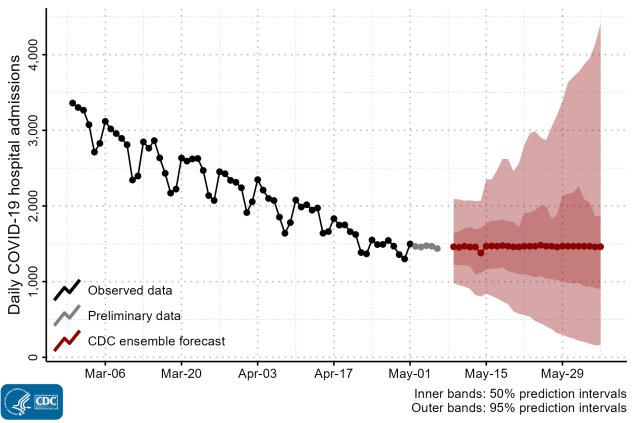

[Centers for Disease Control and Prevention](https://www.cdc.gov/coronavirus/2019-ncov/science/forecasting/hospitalizations-forecasts.html)

# Import Libraries

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Read Data

In [2]:
data = pd.read_csv("/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/transformed_data.csv")
data2 = pd.read_csv("/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/raw_data.csv")

In [3]:
print(data)

      CODE      COUNTRY        DATE    HDI        TC        TD       STI  \
0      AFG  Afghanistan  2019-12-31  0.498  0.000000  0.000000  0.000000   
1      AFG  Afghanistan  2020-01-01  0.498  0.000000  0.000000  0.000000   
2      AFG  Afghanistan  2020-01-02  0.498  0.000000  0.000000  0.000000   
3      AFG  Afghanistan  2020-01-03  0.498  0.000000  0.000000  0.000000   
4      AFG  Afghanistan  2020-01-04  0.498  0.000000  0.000000  0.000000   
...    ...          ...         ...    ...       ...       ...       ...   
50413  ZWE     Zimbabwe  2020-10-15  0.535  8.994048  5.442418  4.341855   
50414  ZWE     Zimbabwe  2020-10-16  0.535  8.996528  5.442418  4.341855   
50415  ZWE     Zimbabwe  2020-10-17  0.535  8.999496  5.442418  4.341855   
50416  ZWE     Zimbabwe  2020-10-18  0.535  9.000853  5.442418  4.341855   
50417  ZWE     Zimbabwe  2020-10-19  0.535  9.005405  5.442418  4.341855   

             POP    GDPCAP  
0      17.477233  7.497754  
1      17.477233  7.497754  


#### The data we are using contains the data on covid-19 cases and their impact on GDP from December 31, 2019, to October 10, 2020.

# Data Preparation

- The dataset that we are using here contains two data files. One file contains raw data, and the other file contains transformed one. But we have to use both datasets for this task, as both of them contain equally important information in different columns.

- Let’s have a look at both datasets one by one:

In [4]:
print(data.head())

  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754


In [5]:
print(data2.head())

  iso_code     location        date  total_cases  total_deaths  \
0      AFG  Afghanistan  2019-12-31          0.0           0.0   
1      AFG  Afghanistan  2020-01-01          0.0           0.0   
2      AFG  Afghanistan  2020-01-02          0.0           0.0   
3      AFG  Afghanistan  2020-01-03          0.0           0.0   
4      AFG  Afghanistan  2020-01-04          0.0           0.0   

   stringency_index  population  gdp_per_capita  human_development_index  \
0               0.0    38928341        1803.987                    0.498   
1               0.0    38928341        1803.987                    0.498   
2               0.0    38928341        1803.987                    0.498   
3               0.0    38928341        1803.987                    0.498   
4               0.0    38928341        1803.987                    0.498   

  Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12  Unnamed: 13  
0      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
1      #NUM!    

- After having initial impressions of both datasets, I found that we have to combine both datasets by creating a new dataset. 

- But before we create a new dataset, let’s have a look at how many samples of each country are present in the dataset:

In [6]:
data["COUNTRY"].value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

- So we don’t have an equal number of samples of each country in the dataset. Let’s have a look at the mode value:

In [7]:
data["COUNTRY"].value_counts().mode()

0    294
dtype: int64

- So 294 is the mode value. We will need to use it for dividing the sum of all the samples related to the human development index, GDP per capita, and the population. 

- Let’s create a new dataset by combining the necessary columns from both datasets:

In [8]:
# Aggregating the data

code = data["CODE"].unique().tolist()
country = data["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = data["POP"].unique().tolist()
gdp = []

for i in country:
    hdi.append((data.loc[data["COUNTRY"] == i, "HDI"]).sum()/294)
    tc.append((data2.loc[data2["location"] == i, "total_cases"]).sum())
    td.append((data2.loc[data2["location"] == i, "total_deaths"]).sum())
    sti.append((data.loc[data["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((data2.loc[data2["location"] == i, "population"]).sum()/294)

aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)), 
                               columns = ["Country Code", "Country", "HDI", 
                                          "Total Cases", "Total Deaths", 
                                          "Stringency Index", "Population"])
print(aggregated_data.head())

  Country Code      Country       HDI  Total Cases  Total Deaths  \
0          AFG  Afghanistan  0.498000    5126433.0      165875.0   
1          ALB      Albania  0.600765    1071951.0       31056.0   
2          DZA      Algeria  0.754000    4893999.0      206429.0   
3          AND      Andorra  0.659551     223576.0        9850.0   
4          AGO       Angola  0.418952     304005.0       11820.0   

   Stringency Index  Population  
0          3.049673   17.477233  
1          3.005624   14.872537  
2          3.195168   17.596309  
3          2.677654   11.254996  
4          2.965560   17.307957  


- I have not included the GDP per capita column yet. I didn’t find the correct figures for GDP per capita in the dataset. So it will be better to manually collect the data about the GDP per capita of the countries.

- As we have so many countries in this data, it will not be easy to manually collect the data about the GDP per capita of all the countries. So let’s select a subsample from this dataset. To create a subsample from this dataset, I will be selecting the top 10 countries with the highest number of covid-19 cases. 

- It will be a perfect sample to study the economic impacts of covid-19. So let’s sort the data according to the total cases of Covid-19:

In [9]:
# Sorting Data According to Total Cases

data = aggregated_data.sort_values(by=["Total Cases"], ascending=False)
print(data.head())

    Country Code        Country      HDI  Total Cases  Total Deaths  \
200          USA  United States  0.92400  746014098.0    26477574.0   
27           BRA         Brazil  0.75900  425704517.0    14340567.0   
90           IND          India  0.64000  407771615.0     7247327.0   
157          RUS         Russia  0.81600  132888951.0     2131571.0   
150          PER           Peru  0.59949   74882695.0     3020038.0   

     Stringency Index  Population  
200          3.350949   19.617637  
27           3.136028   19.174732  
90           3.610552   21.045353  
157          3.380088   18.798668  
150          3.430126   17.311165  


- Now here’s how we can select the top 10 countries with the highest number of cases:

In [10]:
# Top 10 Countries with Highest Covid Cases

data = data.head(10)
print(data)

    Country Code         Country       HDI  Total Cases  Total Deaths  \
200          USA   United States  0.924000  746014098.0    26477574.0   
27           BRA          Brazil  0.759000  425704517.0    14340567.0   
90           IND           India  0.640000  407771615.0     7247327.0   
157          RUS          Russia  0.816000  132888951.0     2131571.0   
150          PER            Peru  0.599490   74882695.0     3020038.0   
125          MEX          Mexico  0.774000   74347548.0     7295850.0   
178          ESP           Spain  0.887969   73717676.0     5510624.0   
175          ZAF    South Africa  0.608653   63027659.0     1357682.0   
42           COL        Colombia  0.581847   60543682.0     1936134.0   
199          GBR  United Kingdom  0.922000   59475032.0     7249573.0   

     Stringency Index  Population  
200          3.350949   19.617637  
27           3.136028   19.174732  
90           3.610552   21.045353  
157          3.380088   18.798668  
150          3.4

- Now I will add two more columns (GDP per capita before Covid-19, GDP per capita during Covid-19) to this dataset:

In [11]:
data["GDP Before Covid"] = [65279.53, 8897.49, 2100.75, 
                            11497.65, 7027.61, 9946.03, 
                            29564.74, 6001.40, 6424.98, 42354.41]
data["GDP During Covid"] = [63543.58, 6796.84, 1900.71, 
                            10126.72, 6126.87, 8346.70, 
                            27057.16, 5090.72, 5332.77, 40284.64]
print(data)

    Country Code         Country       HDI  Total Cases  Total Deaths  \
200          USA   United States  0.924000  746014098.0    26477574.0   
27           BRA          Brazil  0.759000  425704517.0    14340567.0   
90           IND           India  0.640000  407771615.0     7247327.0   
157          RUS          Russia  0.816000  132888951.0     2131571.0   
150          PER            Peru  0.599490   74882695.0     3020038.0   
125          MEX          Mexico  0.774000   74347548.0     7295850.0   
178          ESP           Spain  0.887969   73717676.0     5510624.0   
175          ZAF    South Africa  0.608653   63027659.0     1357682.0   
42           COL        Colombia  0.581847   60543682.0     1936134.0   
199          GBR  United Kingdom  0.922000   59475032.0     7249573.0   

     Stringency Index  Population  GDP Before Covid  GDP During Covid  
200          3.350949   19.617637          65279.53          63543.58  
27           3.136028   19.174732           8897.49 

#### Note: The data about the GDP per capita is collected manually.



# Analyzing the Spread of Covid-19

- Let’s start by analyzing the spread of covid-19 in all the countries with the highest number of covid-19 cases. I will first have a look at all the countries with the highest number of covid-19 cases:

In [12]:
figure = px.bar(data, y='Total Cases', x='Country',
            title="Countries with Highest Covid Cases")
figure.show()

- We can see that the USA is comparatively having a very high number of covid-19 cases as compared to Brazil and India in the second and third positions. 

- Let’s have a look at the total number of deaths among the countries with the highest number of covid-19 cases:

In [13]:
figure = px.bar(data, y='Total Deaths', x='Country',
            title="Countries with Highest Deaths")
figure.show()

- Just like the total number of covid-19 cases, the USA is leading in the deaths, with Brazil and India in the second and third positions. One thing to notice here is that the death rate in India, Russia, and South Africa is comparatively low according to the total number of cases. 

- Let’s compare the total number of cases and total deaths in all these countries:

In [14]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Country"],
    y=data["Total Cases"],
    name='Total Cases',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=data["Country"],
    y=data["Total Deaths"],
    name='Total Deaths',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

- Let’s have a look at the percentage of total deaths and total cases among all the countries with the highest number of covid-19 cases:

In [15]:
# Percentage of Total Cases and Deaths
cases = data["Total Cases"].sum()
deceased = data["Total Deaths"].sum()

labels = ["Total Cases", "Total Deaths"]
values = [cases, deceased]

fig = px.pie(data, values=values, names=labels, 
             title='Percentage of Total Cases and Deaths', hole=0.5)
fig.show()

- How you can calculate the death rate of Covid-19 cases:

In [16]:
death_rate = (data["Total Deaths"].sum() / data["Total Cases"].sum()) * 100
print("Death Rate = ", death_rate)

Death Rate =  3.6144212045653767


# Stringency Index

- Another important column in this dataset is the stringency index. It is a composite measure of response indicators, including school closures, workplace closures, and travel bans. It shows how strictly countries are following these measures to control the spread of covid-19:

In [17]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'], 
             color='Stringency Index', height=400, 
             title= "Stringency Index during Covid-19")
fig.show()

- Here we can see that India is performing well in the stringency index during the outbreak of covid-19.

# Analyzing Covid-19 Impacts on Economy

- Let’s move to analyze the impacts of covid-19 on the economy. Here the GDP per capita is the primary factor for analyzing the economic slowdowns caused due to the outbreak of covid-19. 

- Let’s have a look at the GDP per capita before the outbreak of covid-19 among the countries with the highest number of covid-19 cases:

In [18]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'], 
             color='GDP Before Covid', height=400, 
             title="GDP Per Capita Before Covid-19")
fig.show()

- Let’s have a look at the GDP per capita during the rise in the cases of covid-19:

In [19]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'], 
             color='GDP During Covid', height=400, 
             title="GDP Per Capita During Covid-19")
fig.show()

- Let’s compare the GDP per capita before covid-19 and during covid-19 to have a look at the impact of covid-19 on the GDP per capita:

In [20]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Country"],
    y=data["GDP Before Covid"],
    name='GDP Per Capita Before Covid-19',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=data["Country"],
    y=data["GDP During Covid"],
    name='GDP Per Capita During Covid-19',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

- You can see a drop in GDP per capita in all the countries with the highest number of covid-19 cases.

- One other important economic factor is Human Development Index. It is a statistic composite index of life expectancy, education, and per capita indicators. 

- Let’s have a look at how many countries were spending their budget on the human development:

In [21]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'], 
             color='HDI', height=400, 
             title="Human Development Index during Covid-19")
fig.show()

#### So this is how we can analyze the spread of Covid-19 and its impact on the economy.

# Conclusion
- We studied the spread of covid-19 among the countries and its impact on the global economy. 

- We saw that the outbreak of covid-19 resulted in the highest number of covid-19 cases and deaths in the united states. One major reason behind this is the stringency index of the United States. It is comparatively low according to the population. We also analyzed how the GDP per capita of every country was affected during the outbreak of covid-19. 